In [40]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [44]:
class CNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))
        
    def sigmoid(self, x, derivative=False):
        if derivative:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1 + np.exp(-x))

    def softmax(self, x):
        exps = np.exp(x - x.max())
        return exps / np.sum(exps, axis=0)

    
    def forward(self, X):
        self.cache = {}
        self.cache["X"] = X
        self.cache["hidden_input"] = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.cache["hidden_output"] = self.sigmoid(self.cache["hidden_input"])
        self.cache["output"] = np.dot(self.cache["hidden_output"], self.weights_hidden_output) + self.bias_hidden_output
        self.cache["softmax_output"] = self.softmax(self.cache["output"])
        
        return self.cache["softmax_output"]

    def backprop(self, X, y):
        
        batch_size = X.shape[0]
        output_error = self.cache["softmax_output"] - y
        d_weights_hidden_output = np.dot(self.cache["hidden_output"].T, output_error) / batch_size
        d_bias_hidden_output = np.sum(output_error, axis=0, keepdims=True) / batch_size
        
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * self.sigmoid(self.cache["hidden_input"], derivative=True)
        d_weights_input_hidden = np.dot(X.T, hidden_error) / batch_size
        d_bias_input_hidden = np.sum(hidden_error, axis=0, keepdims=True) / batch_size
        
        # Update weights and biases
        self.weights_input_hidden -= self.learning_rate * d_weights_input_hidden
        self.bias_input_hidden -= self.learning_rate * d_bias_input_hidden
        self.weights_hidden_output -= self.learning_rate * d_weights_hidden_output
        self.bias_hidden_output -= self.learning_rate * d_bias_hidden_output
        
    def train(self, X, y, epochs):
        losses = []  # List to store the loss values
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Backward pass
            self.backprop(X, y)
            
            # Compute loss
            loss = self.cross_entropy_loss(y, output)
            losses.append(loss)  # Append the loss value to the list
            
            # Print loss for the current epoch
            # Print loss for every 50 epochs
            if epoch % 50 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')
        
        # Plot the loss curve
        plt.plot(range(epochs), losses)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss Curve')
        plt.show()
                 
    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    
    def cross_entropy_loss(self, y, output):
        m = y.shape[0]  # Number of samples
        # Avoiding numerical instability: clip values to prevent log(0)
        output = np.clip(output, 1e-15, 1 - 1e-15)
        # Compute cross-entropy loss
        loss = -1 / m * np.sum(y * np.log(output) + (1 - y) * np.log(1 - output))
        return loss

Loading images for character: principal_skinner
Loading images for character: homer_simpson
Loading images for character: bart_simpson
Loading images for character: charles_montgomery_burns
Loading images for character: krusty_the_clown
Loading images for character: lisa_simpson
Loading images for character: ned_flanders
Loading images for character: moe_szyslak
Loading images for character: milhouse_van_houten
Loading images for character: marge_simpson
Loading images for character: principal_skinner
Loading images for character: homer_simpson
Loading images for character: bart_simpson
Loading images for character: charles_montgomery_burns
Loading images for character: krusty_the_clown
Loading images for character: lisa_simpson
Loading images for character: ned_flanders
Loading images for character: moe_szyslak
Loading images for character: milhouse_van_houten
Loading images for character: marge_simpson
Epoch 0, Loss: 17.80170138745693
Epoch 50, Loss: 13.02693994373385
Epoch 100, Loss

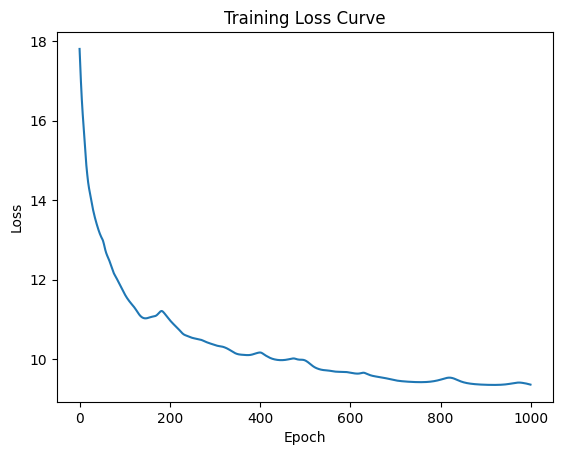

Accuracy: 0.138


In [45]:
def load_data(data_path):
    X_data = []
    y_data = []
    for character_label, character_name in enumerate(os.listdir(data_path)):
        character_path = os.path.join(data_path, character_name)
        if os.path.isdir(character_path):
            print(f"Loading images for character: {character_name}")
            for filename in os.listdir(character_path):
                img_path = os.path.join(character_path, filename)
                try:
                    # Read image using OpenCV
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    # Resize image to a fixed size (e.g., 28x28)
                    img = cv2.resize(img, (28, 28))
                    # Flatten image and append to X_data
                    img_flat = img.flatten()
                    X_data.append(img_flat)
                    y_data.append(character_label)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    X_data = np.array(X_data)
    y_data = np.array(y_data)
    return X_data, y_data

# Define paths to train and test data folders
train_data_path = '/home/gllaizz/Downloads/train'
test_data_path = '/home/gllaizz/Downloads/test'

# Load training and test data
X_train, y_train = load_data(train_data_path)
X_test, y_test = load_data(test_data_path)

# Normalize input features
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert class labels to one-hot encoded vectors
output_size = len(np.unique(y_train))
y_train_onehot = np.eye(output_size)[y_train]

# Set hyperparameters
input_size = X_train.shape[1]  # Assuming flattened images as input
hidden_size = 256
learning_rate = 0.1
epochs = 1000

# Initialize and train the neural network
model = CNN(input_size, hidden_size, output_size, learning_rate)
model.train(X_train, y_train_onehot, epochs)

# Make predictions on test data
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy}')